# Bollinger Bands

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()
import hvplot.pandas

In [21]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('XRP-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date      Open      High       Low     Close  Adj Close      Volume
0 2020-04-09  0.200973  0.201336  0.195926  0.198257   0.198257  1878628668
1 2020-04-10  0.198156  0.198783  0.183706  0.187464   0.187464  2105282079
2 2020-04-11  0.187451  0.192394  0.186113  0.188063   0.188063  1847482831
3 2020-04-12  0.188229  0.193848  0.187617  0.190135   0.190135  2087857417
4 2020-04-13  0.190533  0.190533  0.181808  0.187732   0.187732  2253497429


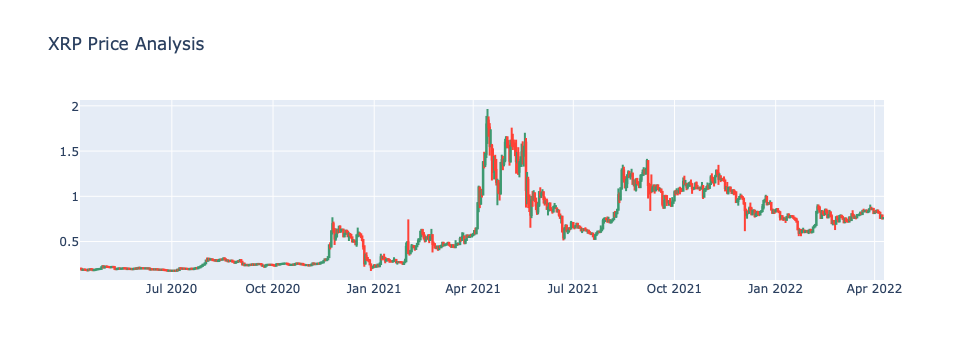

In [22]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "XRP Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show(legend= True)

In [23]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.994682
Low          0.993462
Open         0.989344
Volume       0.350282
Name: Close, dtype: float64


In [24]:
#from autots import AutoTS
#model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
#model = model.fit(data, date_col='Date', value_col='Close', id_col=None)
#prediction = model.predict()
#forecast = prediction.forecast
#print(forecast)

In [25]:
from finta import TA

In [26]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-09,0.200973,0.201336,0.195926,0.198257,0.198257,1878628668
1,2020-04-10,0.198156,0.198783,0.183706,0.187464,0.187464,2105282079
2,2020-04-11,0.187451,0.192394,0.186113,0.188063,0.188063,1847482831
3,2020-04-12,0.188229,0.193848,0.187617,0.190135,0.190135,2087857417
4,2020-04-13,0.190533,0.190533,0.181808,0.187732,0.187732,2253497429
...,...,...,...,...,...,...,...
726,2022-04-05,0.827227,0.833287,0.817110,0.817642,0.817642,1548706718
727,2022-04-06,0.817627,0.818405,0.761285,0.761314,0.761314,2527126540
728,2022-04-07,0.761361,0.789484,0.758114,0.788000,0.788000,1628783831
729,2022-04-08,0.787997,0.792985,0.750893,0.754056,0.754056,1684019539


In [27]:
bbands_df = TA.BBANDS(data)

# Review the DataFrame
bbands_df.iloc[17:25, :]

,BB_UPPER,BB_MIDDLE,BB_LOWER
17,NaN,NaN,NaN
18,NaN,NaN,NaN
19,0.206331,0.191542,0.176752
20,0.214714,0.193000,0.171287
21,0.217513,0.194265,0.171017
22,0.221389,0.195824,0.170260
23,0.225812,0.197513,0.169214
24,0.228612,0.199097,0.169583


In [28]:
XRP_data_df = pd.concat([data, bbands_df], axis=1)

# Review the DataFrame
XRP_data_df.iloc[17:25, :]

,Date,Open,High,Low,Close,Adj Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER
17,2020-04-26,0.195033,0.197215,0.194504,0.196805,0.196805,1692427521,NaN,NaN,NaN
18,2020-04-27,0.196700,0.199275,0.195437,0.197978,0.197978,1792695610,NaN,NaN,NaN
19,2020-04-28,0.198046,0.218108,0.196372,0.215484,0.215484,2515531348,0.206331,0.191542,0.176752
20,2020-04-29,0.215562,0.229627,0.213436,0.227432,0.227432,3041995823,0.214714,0.193000,0.171287
21,2020-04-30,0.227169,0.235703,0.211577,0.212761,0.212761,3145263527,0.217513,0.194265,0.171017
22,2020-05-01,0.212858,0.224771,0.212795,0.219248,0.219248,2306876493,0.221389,0.195824,0.170260
23,2020-05-02,0.219275,0.225606,0.217248,0.223914,0.223914,2170661654,0.225812,0.197513,0.169214
24,2020-05-03,0.224064,0.226340,0.217737,0.219414,0.219414,2182399826,0.228612,0.199097,0.169583


In [29]:
security_close = XRP_data_df[["Adj Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400
)

bb_upper = XRP_data_df[["BB_UPPER"]].hvplot(
    line_color="purple",
    ylabel="Price in $",
    width=1000,
    height=400
)

bb_middle = XRP_data_df[["BB_MIDDLE"]].hvplot(
    line_color="orange",
    ylabel="Price in $",
    width=1000,
    height=400
)

bb_lower = XRP_data_df[["BB_LOWER"]].hvplot(
    line_color="blue",
    ylabel="Price in $",
    width=1000,
    height=400
)


# Overlay plots
bbands_plot = security_close * bb_upper * bb_middle * bb_lower
bbands_plot

:Overlay
   .Curve.I   :Curve   [index]   (Adj Close)
   .Curve.II  :Curve   [index]   (BB_UPPER)
   .Curve.III :Curve   [index]   (BB_MIDDLE)
   .Curve.IV  :Curve   [index]   (BB_LOWER)